In [18]:
import keras
import random
from keras.preprocessing import image
from glob import glob

import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
path = 'train'
ROW, COL = 96,96

In [20]:
dogs, cats = [], []
y_dogs, y_cats = [], []

In [23]:
#se cargan las imagenes  de perros
dog_path = os.path.join(path,'dogs', 'dog*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
#se cargan las imagenes de gatos
cat_path = os.path.join(path,'cats', 'cat*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)

print('Se han cargado todas las imageness ....COMPA..')

Se han cargado todas las imageness ....COMPA..


In [24]:
print('Longitud del array de perros: {}\nLongitud del array de gatos: {}'.format(len(dogs),len(cats)))

Longitud del array de perros: 23000
Longitud del array de gatos: 23000


In [25]:
classes = ['dog','cat']

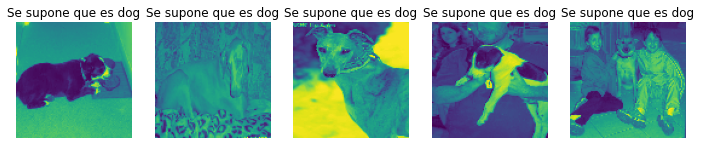

In [26]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img =image.array_to_img(random.choice(dogs))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Se supone que es {}'.format(classes[0]))
    
plt.show()

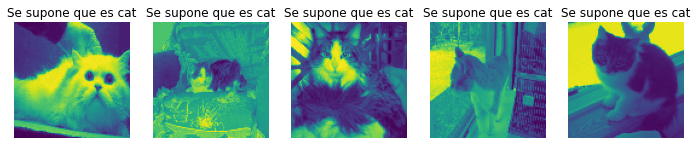

In [27]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    img =image.array_to_img(random.choice(cats))
    plt.imshow(img)
    
    plt.axis('off')
    plt.title('Se supone que es {}'.format(classes[1]))
    
plt.show()

In [28]:
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [32]:
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')
dogs /= 255
cats /= 255

In [33]:
x = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [34]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import save_model, load_model

In [35]:
IMG_CHANNEL = 1
BATCH_SIZE = 128
N_EPOCH = 15
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [36]:
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding listo')

One-Hot Encoding listo


In [37]:
model = Sequential ([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 64)       

In [38]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
checkpoint = ModelCheckpoint('model_chechpoint/dogs_vs_cats_redux_checkpoint.h5')


In [41]:
model.fit(x, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT, verbose=VERBOSE)

Train on 36800 samples, validate on 9200 samples
Epoch 1/15
 - 121s - loss: 0.6362 - accuracy: 0.6509 - val_loss: 1.1452 - val_accuracy: 0.2500
Epoch 2/15
 - 96s - loss: 0.4923 - accuracy: 0.7624 - val_loss: 0.4483 - val_accuracy: 0.8046
Epoch 3/15
 - 95s - loss: 0.3953 - accuracy: 0.8205 - val_loss: 0.4833 - val_accuracy: 0.7565
Epoch 4/15
 - 96s - loss: 0.3130 - accuracy: 0.8667 - val_loss: 0.4092 - val_accuracy: 0.8038
Epoch 5/15
 - 95s - loss: 0.2400 - accuracy: 0.9024 - val_loss: 0.1448 - val_accuracy: 0.9416
Epoch 6/15
 - 96s - loss: 0.1683 - accuracy: 0.9355 - val_loss: 0.1273 - val_accuracy: 0.9526
Epoch 7/15
 - 96s - loss: 0.1176 - accuracy: 0.9570 - val_loss: 0.1332 - val_accuracy: 0.9485
Epoch 8/15
 - 95s - loss: 0.0883 - accuracy: 0.9689 - val_loss: 0.0242 - val_accuracy: 0.9938
Epoch 9/15
 - 96s - loss: 0.0735 - accuracy: 0.9750 - val_loss: 0.0112 - val_accuracy: 0.9970
Epoch 10/15
 - 96s - loss: 0.0601 - accuracy: 0.9798 - val_loss: 0.0231 - val_accuracy: 0.9936
Epoch 11/

In [43]:
scores = model.evaluate(x,y,verbose=2)
print('ACCURACY DEL MODELO\n{}: {}%'.format(model.metrics_names[1],scores[1]*100))

ACCURACY DEL MODELO
accuracy: 99.90869760513306%
